In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [2]:
cluster_regions = pd.read_csv(r'C:\Users\Iman\Documents\Data Mining\Raw Data\Dota 2\cluster_regions.csv')
cluster_regions.head()

,cluster,region
0,111,US WEST
1,112,US WEST
2,113,US WEST
3,121,US EAST
4,122,US EAST


In [3]:
cluster_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
cluster    53 non-null int64
region     53 non-null object
dtypes: int64(1), object(1)
memory usage: 700.0+ bytes


In [4]:
cluster_regions['region'].unique()

array(['US WEST', 'US EAST', 'EUROPE', 'JAPAN', 'SINGAPORE', 'DUBAI',
       'AUSTRALIA', 'STOCKHOLM', 'AUSTRIA', 'BRAZIL', 'SOUTHAFRICA',
       'PW TELECOM ZHEJIANG', 'PW TELECOM SHANGHAI',
       'PW TELECOM GUANGDONG', 'PW TELECOM WUHAN', 'PW UNICOM',
       'PW UNICOM TIANJIN', 'CHILE', 'PERU', 'INDIA'], dtype=object)

In [5]:
match = pd.read_csv(r'C:\Users\Iman\Documents\Data Mining\Raw Data\Dota 2\match.csv')
match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
match_id                   50000 non-null int64
start_time                 50000 non-null int64
duration                   50000 non-null int64
tower_status_radiant       50000 non-null int64
tower_status_dire          50000 non-null int64
barracks_status_dire       50000 non-null int64
barracks_status_radiant    50000 non-null int64
first_blood_time           50000 non-null int64
game_mode                  50000 non-null int64
radiant_win                50000 non-null bool
negative_votes             50000 non-null int64
positive_votes             50000 non-null int64
cluster                    50000 non-null int64
dtypes: bool(1), int64(12)
memory usage: 4.6 MB


In [7]:
cluster_lookup = dict(zip(cluster_regions['cluster'], cluster_regions['region']))
cluster_lookup[0] = 'Unknown'
match['region'] = match['cluster'].apply(lambda _id: cluster_lookup[_id])
match

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,region
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,SINGAPORE
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154,SINGAPORE
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132,EUROPE
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191,AUSTRIA
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156,SINGAPORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,0,0,111,US WEST
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,0,0,204,BRAZIL
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,0,0,111,US WEST
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,0,0,151,SINGAPORE


In [8]:
match.describe(include='all')

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,region
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,EUROPE
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25943,NaN,NaN,NaN,18447
mean,24999.500000,1.447573e+09,2476.453500,1000.016440,935.250060,34.529460,34.77526,93.825520,21.468000,NaN,0.015480,0.036820,142.304720,NaN
std,14433.901067,1.485270e+05,634.631261,948.211846,937.974714,29.209672,29.73214,92.648332,3.218258,NaN,0.364696,0.871068,25.156608,NaN
min,0.000000,1.446750e+09,59.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,NaN,0.000000,0.000000,111.000000,NaN
25%,12499.750000,1.447456e+09,2029.000000,0.000000,0.000000,0.000000,0.00000,9.000000,22.000000,NaN,0.000000,0.000000,123.000000,NaN
50%,24999.500000,1.447577e+09,2415.000000,1536.000000,384.000000,51.000000,51.00000,77.000000,22.000000,NaN,0.000000,0.000000,133.000000,NaN
75%,37499.250000,1.447700e+09,2872.000000,1974.000000,1972.000000,63.000000,63.00000,144.000000,22.000000,NaN,0.000000,0.000000,154.000000,NaN


In [9]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
match_id                   50000 non-null int64
start_time                 50000 non-null int64
duration                   50000 non-null int64
tower_status_radiant       50000 non-null int64
tower_status_dire          50000 non-null int64
barracks_status_dire       50000 non-null int64
barracks_status_radiant    50000 non-null int64
first_blood_time           50000 non-null int64
game_mode                  50000 non-null int64
radiant_win                50000 non-null bool
negative_votes             50000 non-null int64
positive_votes             50000 non-null int64
cluster                    50000 non-null int64
region                     50000 non-null object
dtypes: bool(1), int64(12), object(1)
memory usage: 4.8+ MB


In [7]:
match = match[match['game_mode']==22]

In [10]:
data_match = match[['match_id', 'duration', 'first_blood_time', 'radiant_win', 'negative_votes', 'positive_votes', 'region']]
data_match.info()
data_match.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
match_id            50000 non-null int64
duration            50000 non-null int64
first_blood_time    50000 non-null int64
radiant_win         50000 non-null bool
negative_votes      50000 non-null int64
positive_votes      50000 non-null int64
region              50000 non-null object
dtypes: bool(1), int64(5), object(1)
memory usage: 2.1+ MB


,match_id,duration,first_blood_time,radiant_win,negative_votes,positive_votes,region
count,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000
unique,NaN,NaN,NaN,2,NaN,NaN,15
top,NaN,NaN,NaN,True,NaN,NaN,EUROPE
freq,NaN,NaN,NaN,25943,NaN,NaN,18447
mean,24999.500000,2476.453500,93.825520,NaN,0.015480,0.036820,NaN
std,14433.901067,634.631261,92.648332,NaN,0.364696,0.871068,NaN
min,0.000000,59.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,12499.750000,2029.000000,9.000000,NaN,0.000000,0.000000,NaN
50%,24999.500000,2415.000000,77.000000,NaN,0.000000,0.000000,NaN
75%,37499.250000,2872.000000,144.000000,NaN,0.000000,0.000000,NaN


In [9]:
data_match = data_match[data_match.duration >= 600]
data_match.describe(include='all')

,match_id,duration,first_blood_time,radiant_win,negative_votes,positive_votes,region
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000,48620
unique,NaN,NaN,NaN,2,NaN,NaN,15
top,NaN,NaN,NaN,True,NaN,NaN,EUROPE
freq,NaN,NaN,NaN,25239,NaN,NaN,17706
mean,24984.690559,2477.174476,93.629186,NaN,0.015467,0.036569,NaN
std,14436.998088,630.282007,92.278577,NaN,0.368675,0.880098,NaN
min,0.000000,605.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,12487.750000,2029.000000,10.000000,NaN,0.000000,0.000000,NaN
50%,24974.500000,2414.000000,77.000000,NaN,0.000000,0.000000,NaN
75%,37478.250000,2872.000000,144.000000,NaN,0.000000,0.000000,NaN


In [53]:
data_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 49999
Data columns (total 7 columns):
match_id            48620 non-null int64
duration            48620 non-null int64
first_blood_time    48620 non-null int64
radiant_win         48620 non-null bool
negative_votes      48620 non-null int64
positive_votes      48620 non-null int64
region              48620 non-null object
dtypes: bool(1), int64(5), object(1)
memory usage: 3.5+ MB


Text(0, 0.5, 'Frequency')

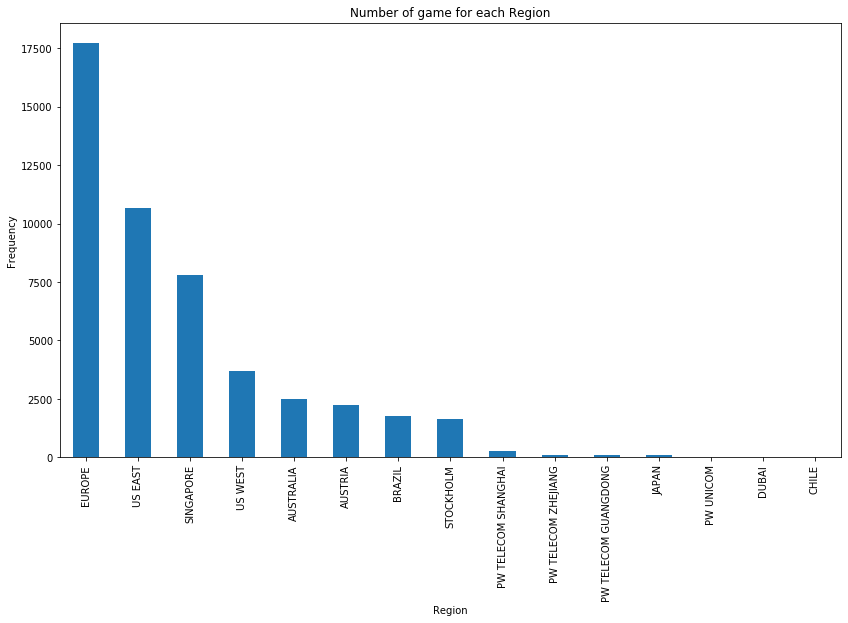

In [10]:
# Region
reg = data_match['region'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of game for each Region",
                                    )
reg.set_xlabel("Region")
reg.set_ylabel("Frequency")

Number of Positive Votes = 1778
Number of Negative Votes = 752


Text(0.5, 1.0, 'Number of Votes')

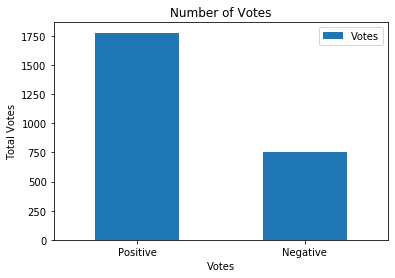

In [11]:
# Votes
npos_votes = data_match['positive_votes'].sum()
nneg_votes = data_match['negative_votes'].sum()
print('Number of Positive Votes =', npos_votes)
print('Number of Negative Votes =', nneg_votes)

df = pd.DataFrame({'lab':['Positive', 'Negative'], 'Votes':[npos_votes, nneg_votes]})
ax = df.plot.bar(x='lab', y='Votes', rot=0)
ax.set_xlabel("Votes")
ax.set_ylabel("Total Votes")
plt.title('Number of Votes')

Radiant team win 25239 matches
Dire team win 23381 matches


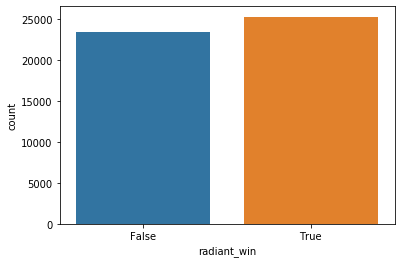

In [12]:
# Winner

sns.countplot(data_match['radiant_win'])

rad_win = data_match['radiant_win'].sum()
dire_win = len(data_match['radiant_win']) - rad_win
print('Radiant team win', rad_win, 'matches')
print('Dire team win', dire_win, 'matches')

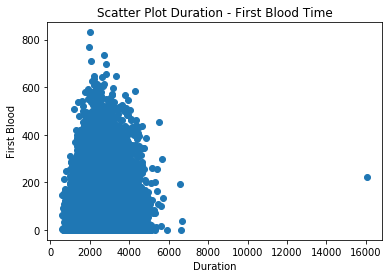

Correlation Matrix is [[1.         0.02093739]
 [0.02093739 1.        ]]


In [13]:
# Scatter Plot Duration & First Blood Time
y = data_match['first_blood_time']
x = data_match['duration']
plt.scatter(x, y)
plt.title('Scatter Plot Duration - First Blood Time')
plt.xlabel('Duration')
plt.ylabel('First Blood')

plt.show()

corr = np.corrcoef(x, y)
print('Correlation Matrix is', corr)

In [23]:
hero_names = pd.read_csv(r'C:\Users\Iman\Documents\Data Mining\Raw Data\Dota 2\hero_names.csv')
hero_names.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [24]:
hero_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
name              112 non-null object
hero_id           112 non-null int64
localized_name    112 non-null object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [16]:
players = pd.read_csv(r'C:\Users\Iman\Documents\Data Mining\Raw Data\Dota 2\players.csv')
players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 73 columns):
match_id                             500000 non-null int64
account_id                           500000 non-null int64
hero_id                              500000 non-null int64
player_slot                          500000 non-null int64
gold                                 500000 non-null int64
gold_spent                           500000 non-null int64
gold_per_min                         500000 non-null int64
xp_per_min                           500000 non-null int64
kills                                500000 non-null int64
deaths                               500000 non-null int64
assists                              500000 non-null int64
denies                               500000 non-null int64
last_hits                            500000 non-null int64
stuns                                500000 non-null object
hero_damage                          500000 non-null int64
her

In [18]:
players = players[['match_id', "hero_id", "gold_per_min", "xp_per_min", 
                   "kills", "assists", "denies", "last_hits", "hero_healing", 
                   "hero_damage", "tower_damage", "level", "xp_hero", "xp_creep", 'leaver_status']]
players.head()

,match_id,hero_id,gold_per_min,xp_per_min,kills,assists,denies,last_hits,hero_healing,hero_damage,tower_damage,level,xp_hero,xp_creep,leaver_status
0,0,86,347,362,9,18,1,30,218,8690,143,16,8840.0,5440.0,0
1,0,51,494,659,13,18,9,109,0,23747,423,22,14331.0,8440.0,0
2,0,83,350,385,0,15,1,58,1595,4217,399,17,6692.0,8112.0,0
3,0,11,599,605,8,19,6,271,2714,14832,6055,21,8583.0,14230.0,0
4,0,67,613,762,20,17,13,245,243,33740,1833,24,15814.0,14325.0,0


In [19]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
match_id         500000 non-null int64
hero_id          500000 non-null int64
gold_per_min     500000 non-null int64
xp_per_min       500000 non-null int64
kills            500000 non-null int64
assists          500000 non-null int64
denies           500000 non-null int64
last_hits        500000 non-null int64
hero_healing     500000 non-null int64
hero_damage      500000 non-null int64
tower_damage     500000 non-null int64
level            500000 non-null int64
xp_hero          498117 non-null float64
xp_creep         499932 non-null float64
leaver_status    500000 non-null int64
dtypes: float64(2), int64(13)
memory usage: 57.2 MB


In [20]:
players = players[players['leaver_status']==0]
players = players.dropna(axis=0, subset=['xp_hero','xp_creep'])
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487116 entries, 0 to 499999
Data columns (total 15 columns):
match_id         487116 non-null int64
hero_id          487116 non-null int64
gold_per_min     487116 non-null int64
xp_per_min       487116 non-null int64
kills            487116 non-null int64
assists          487116 non-null int64
denies           487116 non-null int64
last_hits        487116 non-null int64
hero_healing     487116 non-null int64
hero_damage      487116 non-null int64
tower_damage     487116 non-null int64
level            487116 non-null int64
xp_hero          487116 non-null float64
xp_creep         487116 non-null float64
leaver_status    487116 non-null int64
dtypes: float64(2), int64(13)
memory usage: 59.5 MB


In [21]:
players['duration'] = 0
duration_dict = data_match.set_index('match_id').to_dict()['duration']
players['duration'] = players['match_id'].map(duration_dict)
players = players.dropna(axis=0,subset=['duration'])
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487116 entries, 0 to 499999
Data columns (total 16 columns):
match_id         487116 non-null int64
hero_id          487116 non-null int64
gold_per_min     487116 non-null int64
xp_per_min       487116 non-null int64
kills            487116 non-null int64
assists          487116 non-null int64
denies           487116 non-null int64
last_hits        487116 non-null int64
hero_healing     487116 non-null int64
hero_damage      487116 non-null int64
tower_damage     487116 non-null int64
level            487116 non-null int64
xp_hero          487116 non-null float64
xp_creep         487116 non-null float64
leaver_status    487116 non-null int64
duration         487116 non-null int64
dtypes: float64(2), int64(14)
memory usage: 63.2 MB


In [25]:
players['localized_name'] = 0
hero_dict = hero_names.set_index('hero_id').to_dict()['localized_name']
players['localized_name'] = players['hero_id'].map(hero_dict)
players.rename(columns={'localized_name':'hero'}, inplace=True)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487116 entries, 0 to 499999
Data columns (total 17 columns):
match_id         487116 non-null int64
hero_id          487116 non-null int64
gold_per_min     487116 non-null int64
xp_per_min       487116 non-null int64
kills            487116 non-null int64
assists          487116 non-null int64
denies           487116 non-null int64
last_hits        487116 non-null int64
hero_healing     487116 non-null int64
hero_damage      487116 non-null int64
tower_damage     487116 non-null int64
level            487116 non-null int64
xp_hero          487116 non-null float64
xp_creep         487116 non-null float64
leaver_status    487116 non-null int64
duration         487116 non-null int64
hero             487116 non-null object
dtypes: float64(2), int64(14), object(1)
memory usage: 65.0+ MB


In [30]:
players.describe(include='all')

,match_id,hero_id,gold_per_min,xp_per_min,kills,assists,denies,last_hits,hero_healing,hero_damage,tower_damage,level,xp_hero,xp_creep,leaver_status,duration,hero
count,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.000000,487116.0,487116.000000,487116
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windranger
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20343
mean,25016.172641,50.555237,418.115231,454.180171,7.503065,11.914587,5.166757,130.759714,474.247590,12366.302552,1339.260127,18.187023,8848.583413,9551.312845,0.0,2485.651032,NaN
std,14426.567931,32.806821,137.355456,143.875153,5.432701,6.342708,5.915961,100.192360,1220.823921,6691.359414,1813.627245,4.243265,4834.796572,4397.831924,0.0,627.368074,NaN
min,0.000000,1.000000,106.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,20.000000,0.0,59.000000,NaN
25%,12529.000000,21.000000,320.000000,348.000000,3.000000,7.000000,1.000000,55.000000,0.000000,7442.000000,129.000000,15.000000,5136.000000,6209.000000,0.0,2037.000000,NaN
50%,25022.000000,47.000000,398.000000,446.000000,6.000000,11.000000,3.000000,107.000000,0.000000,11064.000000,577.000000,18.000000,8208.000000,8726.000000,0.0,2421.000000,NaN
75%,37505.000000,75.000000,498.000000,552.000000,10.000000,16.000000,7.000000,179.000000,230.000000,15983.000000,1801.000000,21.000000,12006.000000,12144.000000,0.0,2876.000000,NaN


In [34]:
df = players.drop(['hero_id','leaver_status','duration', 'match_id'], axis=1).groupby('hero').mean()
df.describe(include='all')

,gold_per_min,xp_per_min,kills,assists,denies,last_hits,hero_healing,hero_damage,tower_damage,level,xp_hero,xp_creep
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,407.282869,445.607324,7.144846,11.807784,4.674722,127.801847,547.534867,11989.927165,1321.008884,18.024064,8627.530781,9393.478099
std,75.272816,77.204364,2.281494,2.565474,2.631323,63.671065,1012.217925,3344.345927,952.966066,1.676125,1268.530698,2475.957593
min,289.916818,312.857511,2.457767,5.930937,0.831760,29.984214,0.761115,4334.973420,198.458120,14.506375,3430.764228,5163.423194
25%,349.244529,378.089720,5.432235,10.095668,2.970822,73.494043,31.378867,9709.826892,434.337342,16.605872,7824.810023,6962.946508
50%,405.922547,447.113643,7.076029,11.894884,3.792548,123.159650,142.425624,11789.600916,1092.180487,18.173740,8713.476492,9524.511630
75%,461.999452,502.291582,8.916933,13.131064,6.173736,172.656875,459.528012,14240.390226,1949.002020,19.260187,9429.106508,11333.608916
max,718.974270,686.722326,12.882411,18.423214,14.628085,302.967402,5086.485264,23962.737054,3893.883403,22.080050,12733.738142,16465.126441


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, Abaddon to Zeus
Data columns (total 14 columns):
hero_id         110 non-null float64
gold_spent      110 non-null float64
gold_per_min    110 non-null float64
xp_per_min      110 non-null float64
kills           110 non-null float64
assists         110 non-null float64
denies          110 non-null float64
last_hits       110 non-null float64
hero_healing    110 non-null float64
hero_damage     110 non-null float64
tower_damage    110 non-null float64
level           110 non-null float64
xp_hero         110 non-null float64
xp_creep        110 non-null float64
dtypes: float64(14)
memory usage: 12.5+ KB


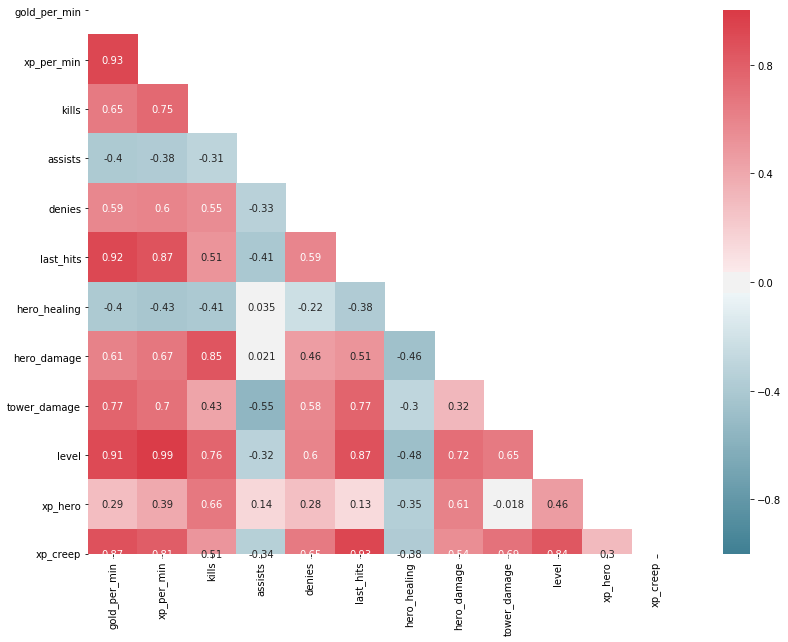

In [37]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))

sns.heatmap(corr, cmap= sns.diverging_palette(220, 10, as_cmap= True)
            , mask=mask, vmax=1, vmin=-1, center=0, square=True,annot=True)

In [38]:
df2 = df[['kills', 'assists', 'denies', 'hero_healing', 'tower_damage', 'xp_hero', 'xp_creep']]

In [39]:
df2.describe(include='all')

,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,7.144846,11.807784,4.674722,547.534867,1321.008884,8627.530781,9393.478099
std,2.281494,2.565474,2.631323,1012.217925,952.966066,1268.530698,2475.957593
min,2.457767,5.930937,0.831760,0.761115,198.458120,3430.764228,5163.423194
25%,5.432235,10.095668,2.970822,31.378867,434.337342,7824.810023,6962.946508
50%,7.076029,11.894884,3.792548,142.425624,1092.180487,8713.476492,9524.511630
75%,8.916933,13.131064,6.173736,459.528012,1949.002020,9429.106508,11333.608916
max,12.882411,18.423214,14.628085,5086.485264,3893.883403,12733.738142,16465.126441


In [40]:
df2_stdz = RobustScaler().fit(df2)

In [42]:
df2_norm = pd.DataFrame(df2_stdz.transform(df2)).rename(columns={0:'kills',1:'assists',2:'denies',3:'hero_healing',
                                                                4:'tower_damage',5:'xp_hero',6:'xp_creep'})
df2_norm.describe(include='all')

,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep
count,110.000000,110.000000,1.100000e+02,110.000000,1.100000e+02,110.000000,110.000000
mean,0.019748,-0.028695,2.754283e-01,0.946187,1.510753e-01,-0.053572,-0.029980
std,0.654718,0.845186,8.215403e-01,2.364171,6.291598e-01,0.790708,0.566495
min,-1.325298,-1.964801,-9.244047e-01,-0.330877,-5.900464e-01,-3.292853,-0.997809
25%,-0.471718,-0.592745,-2.565560e-01,-0.259365,-4.343160e-01,-0.553929,-0.586082
50%,0.000000,0.000000,6.938894e-17,0.000000,7.459311e-17,0.000000,0.000000
75%,0.528282,0.407255,7.434440e-01,0.740635,5.656840e-01,0.446071,0.413918
max,1.666251,2.150735,3.383024e+00,11.547517,1.849718e+00,2.505934,1.588001


In [45]:
df3 = df2_norm
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
kills           110 non-null float64
assists         110 non-null float64
denies          110 non-null float64
hero_healing    110 non-null float64
tower_damage    110 non-null float64
xp_hero         110 non-null float64
xp_creep        110 non-null float64
dtypes: float64(7)
memory usage: 6.1 KB


To find optimum number of cluster k, silhouette methode will be used.

In [46]:
km_scores= []
km_silhouette = []
for i in range(2,12):
    km = cluster.KMeans(n_clusters=i, random_state=0).fit(df3)
    preds = km.predict(df3)
    
    silhouette = silhouette_score(df3,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    print("-"*100)

Silhouette score for number of cluster(s) 2: 0.6446623732141168
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 3: 0.3204065281144485
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 4: 0.3306208471248221
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 5: 0.33472079103193014
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 6: 0.27058770641047614
----------------------------------------------------------------------------------------------------
Silhouette score for number of cluster(s) 7: 0.2580527825943787
----------------------------------------------------------------------------------------------------
Silhouet

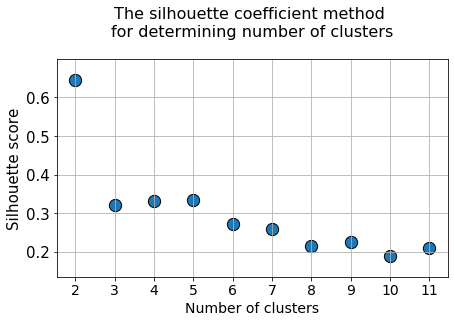

In [47]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [49]:
km = cluster.KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, random_state = 70)
km.fit(df3)
km.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

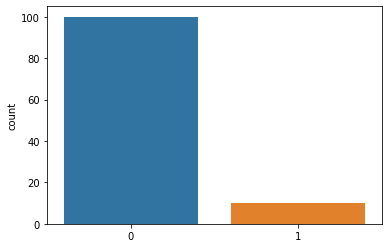

In [50]:
C_kmpp = km.predict(df3)

sns.countplot(C_kmpp)
C_kmpp[:10]

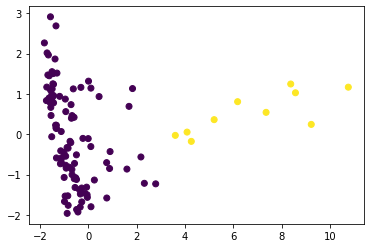

In [51]:
pca = PCA(n_components=2).fit(df3)
data2D = pca.transform(df3)
plt.scatter(data2D[:,0], data2D[:,1], c = C_kmpp)

In [52]:
df4 = df[['kills','assists','denies','hero_healing','tower_damage','xp_hero','xp_creep']]

In [53]:
df4['Kmeans'] = km.labels_
df4.groupby(['Kmeans']).mean()

,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep
Kmeans,,,,,,,
0,7.394525,11.838244,4.805451,263.601477,1388.464343,8762.941396,9645.693039
1,4.648063,11.503185,3.367428,3386.868763,646.454295,7273.424627,6871.328704


In [54]:
df_Kmeans = df4.groupby(['Kmeans']).mean()
df_Kmeans['count'] = df_Kmeans['kills'].count()
df_Kmeans

,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep,count
Kmeans,,,,,,,,
0,7.394525,11.838244,4.805451,263.601477,1388.464343,8762.941396,9645.693039,2
1,4.648063,11.503185,3.367428,3386.868763,646.454295,7273.424627,6871.328704,2


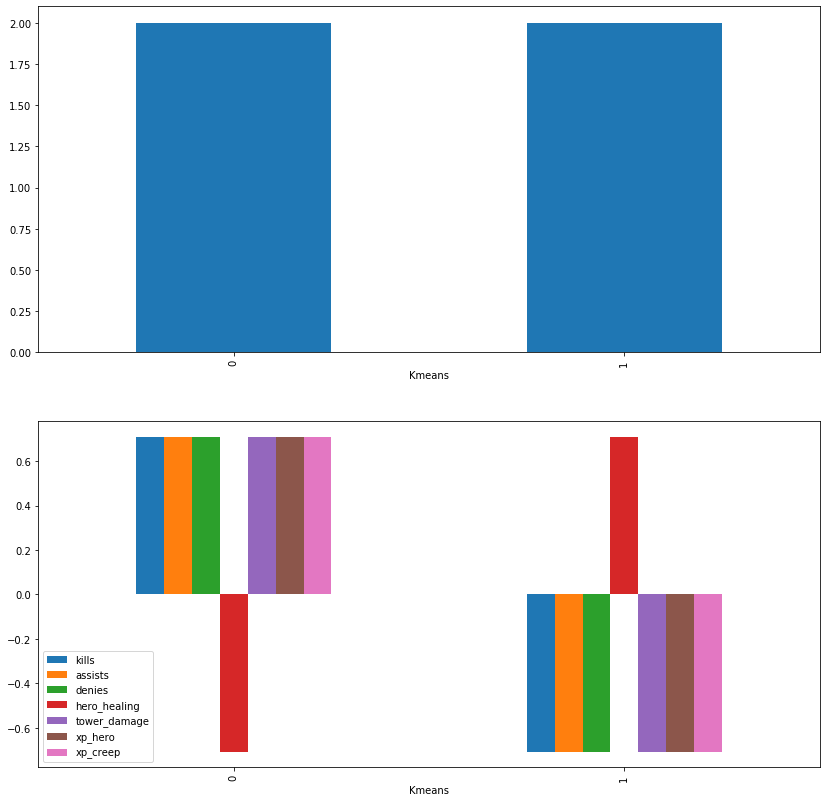

In [59]:
# normalize
df_Kmeans_mean = df_Kmeans.mean(axis=0)
df_Kmeans_std = df_Kmeans.std(axis=0)
df_Kmeans_norm = (df_Kmeans - df_Kmeans_mean) / df_Kmeans_std

# make plot
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(14,14))
df_Kmeans['count'].plot.bar(ax=axis1)
df_Kmeans_norm.iloc[:,:7].plot.bar(ax=axis2).legend(loc='lower left')

In [61]:
df4['heroclass'] = 'na'
df4.loc[(df4['Kmeans']==0),'hero_class'] = 'Others'
df4.loc[(df4['Kmeans']==1),'hero_class'] = 'Healer'

In [62]:
Heroes_clustering = df4[['hero_class','kills','assists','denies','hero_healing','tower_damage',
                         'xp_hero','xp_creep']].sort_values(['hero_class'])
Heroes_clustering

,hero_class,kills,assists,denies,hero_healing,tower_damage,xp_hero,xp_creep
hero,,,,,,,,
Abaddon,Healer,5.060662,12.795419,3.287837,2272.525534,1027.387187,8526.805633,8211.376045
Necrophos,Healer,8.864897,15.440925,5.516438,3289.864555,754.781507,8572.247432,9145.960959
Io,Healer,3.450516,12.662417,2.168185,4390.012143,314.190043,6752.811779,5163.423194
Dazzle,Healer,2.656519,10.947119,3.840752,5086.485264,432.588599,6385.701880,5996.153184
Chen,Healer,3.876138,9.637523,1.023679,3576.100182,1208.041894,5920.519126,6903.271403
...,...,...,...,...,...,...,...,...
Faceless Void,Others,8.354932,8.780464,7.155706,2.919407,1583.261444,8982.881044,12446.985171
Enigma,Others,4.475318,15.345143,3.526672,563.125398,1034.844347,8361.173567,9565.291799
Enchantress,Others,7.306435,8.743616,3.974464,1282.444331,947.508682,8485.008172,9540.941777
